# Numpy 

- A library optimized for scientific computation
- Written in C 
- Comes as a separate package (not included in standard Python)
- Can be linked with performant Linear Algebra libraries, e.g. Intel MKL, IBM ESSL, Cray LibSci, OpenBLAS, LAPACK etc.
- Motivation -- Maximize leveraging performance from the underlying architecture with minimal work

In [1]:
import numpy as np

In [2]:
np.show_config()

mkl_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/Users/sindh/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\include', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\lib', 'C:/Users/sindh/Anaconda3\\Library\\include']
blas_mkl_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/Users/sindh/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\include', 'C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2019.0.117\\windows\\mkl\\lib', 'C:/U

In [3]:
from random import gauss
import time

# Pure Python version of Matrix Multiplication

In [4]:
# Input matrix initialization
def make_matrix(m=500,n=500):
    a=list()
    for i in range(m):
        a.append(list())
        for j in range(n):
            a[i].append(0)
    return a

In [5]:
def init_matrix(m=500,n=500):
    a=make_matrix(m,n)
    for i in range(m):
        for j in range(n):
            a[i][j]=gauss(0,1)
    return a

In [6]:
def matmult(A,B):
    C = make_matrix(len(A),len(B[0]))
    t = time.time()
    # iterate over rows of matrix A
    for i in range(len(A)):
        #iterate over columns of matrix B
        for j in range(len(B[0])):
            #iterate over rows of matrix B
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    print("Elapsed time=",1e3*(time.time() - t), "milliseconds")
    return C

In [7]:
m=100
n=100

In [8]:
A=init_matrix(m,n)

In [9]:
B=init_matrix(m,n)

In [10]:
C = matmult(A,B)

Elapsed time= 117.51389503479004 milliseconds


# Numpy version of Matrix Multiplication

In [11]:
import numpy as np

In [12]:
a=np.asarray(A)
b=np.asarray(B)

In [13]:
t=time.time()
c=np.dot(a,b)
print("Elapsed time=",1e3*(time.time() - t), "milliseconds")

Elapsed time= 4.054069519042969 milliseconds


In [14]:
# Check if the output is same from both algorithms 
print(c-np.asarray(C))

[[-3.55271368e-15 -3.55271368e-15 -1.77635684e-15 ... -3.55271368e-15
  -7.10542736e-15 -1.77635684e-15]
 [ 0.00000000e+00  0.00000000e+00  1.77635684e-15 ...  2.22044605e-16
   3.55271368e-15  2.22044605e-16]
 [-3.55271368e-15 -1.77635684e-15  0.00000000e+00 ...  5.32907052e-15
  -1.77635684e-15  3.55271368e-15]
 ...
 [-1.77635684e-15  1.55431223e-15  0.00000000e+00 ... -8.88178420e-16
   4.44089210e-15  1.33226763e-15]
 [-3.55271368e-15 -3.55271368e-15  8.88178420e-16 ...  1.77635684e-15
  -1.42108547e-14  7.10542736e-15]
 [ 8.88178420e-16  3.55271368e-15  0.00000000e+00 ...  0.00000000e+00
  -1.33226763e-15 -7.10542736e-15]]


# Benefits of using Numpy Arrays

- memory management is far superior than using lists
    - C like contigious alloaction of memory blocks point to by a python object
    - 0 based indicies, Row Major order
    - Dimensions are contigious in memory
        - favors cache reuse
        - favors vectorisation depending on microarchitecture
- working with multidimensional arrays is convinient
- dtype has familiar datatypes
    - Note: lot of data can fit into a cacheline if the dtype is shorter e.g. float16, float32 etc.
- Type castig is possible
    - implicit casting is default, e.g. in decalartion array([-1,1,1.9],dytpe='int8') 1.9 with be truncated to 1 without warnings
    - explicit casting is convinient: astype(), asarray(), tolist(), fromstring()
- I/O opeartions such Read, Write, and Shape shifiting of arrays e.g. flatten 3D -> 1D array, are optimized for performance while avoiding loops
- ndarray comes with a number of element wise transformation methods/ops called ufuncs (vector arithmentic, factorization, tignometry, boolean, type casting etc)
    - optimized for performance
    - broadcasting : relaxes the need of two arrays to be consistent in shape for valid computation
    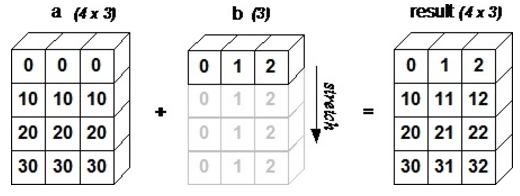
    - collectives :  dimensional operations e.g. reduce, accumulate, reduceat etc

In [17]:
np.multiply.reduce([2,3,5])

30

- ndarray also comes with a number of vector and matrix operations (dot, trace, transpose, conjugate, min, max, mean, std etc)
- less code, less loops
- some numpy array operations release Gloable Interpreter Lock (GIL)
- C like performance
    

## Global Interpreter Lock (GIL)

This is an in-built restriction (known as mutex) imposed by the Python interpreter to execute only one Python instruction of a program at a time. This was designed in Cython in the interest of thread safety.

- Compute bound instructions which could leverage multicore architecture for improved performance are hindered by GIL
- Some Numpy array opeartions release GIL without user's knowledge.
- Other ways to avoid GIL
    - Use multithreading/multiprocessing package